In [19]:
import pandas as pd

#for oversampling & undersampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Load data
selected_train = pd.read_csv('Data/selected_train.csv')
cleaned_train = pd.read_csv('Data/cleaned_train.csv')

In [21]:
print(selected_train.shape)
print(cleaned_train.shape)

(159571, 48)
(159571, 10)


In [22]:
#Concatenate clean_text column to selected_train dataset
selected_train = pd.concat([selected_train, cleaned_train['clean_text']], axis = 1)

In [49]:
def Oversample(df, cat):
    X_train = df.drop(cat, axis = 1)
    y_train = df[cat]

    ros = RandomOverSampler(random_state=0, sampling_strategy=0.5)
    X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)

    # Check the number of records after over sampling
    print(X_train_ros.shape)
    print(sorted(Counter(y_train_ros).items()))

    #Concatenate X_train and y_train
    train_oversampled = pd.concat([X_train_ros,  y_train_ros], axis=1)
    return train_oversampled

In [53]:
cats = ['threat', 'identity_hate', 'severe_toxic', 'toxic']

train_oversampled = Oversample(selected_train, cats[0])
train_oversampled = Oversample(train_oversampled, cats[1])
train_oversampled = Oversample(train_oversampled, cats[2])

(238639, 48)
[(0, 159093), (1, 79546)]
(331663, 48)
[(0, 221109), (1, 110554)]
(421989, 48)
[(0, 281326), (1, 140663)]


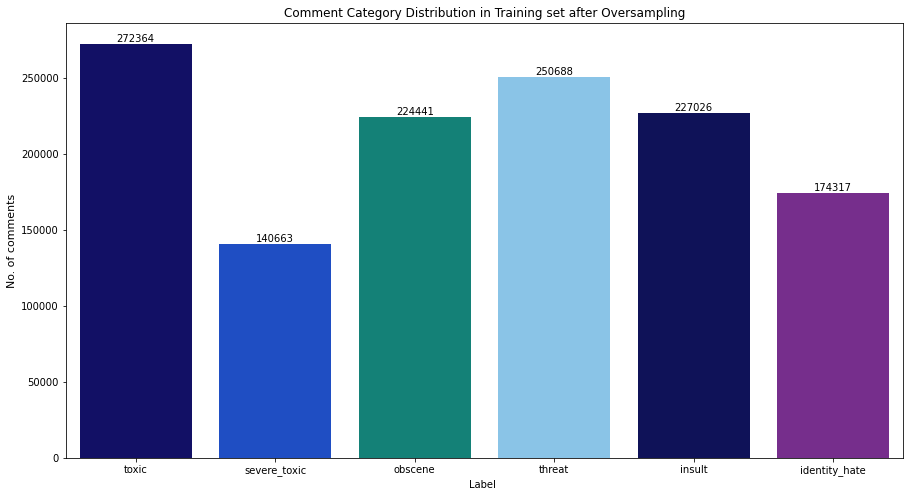

In [54]:
colors_ = ["deep blue","blue", "teal", "lightblue", "darkblue", "purple"]

palette= sns.xkcd_palette(colors_)

x = train_oversampled[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum()

plt.figure(figsize=(15,8))

ax= sns.barplot(x=x.index,y=x.values,palette=palette)
plt.title("Comment Category Distribution in Training set after Oversampling")
plt.xlabel('Label ')
plt.ylabel('No. of comments', fontsize=11)

patch = ax.patches
labels = x.values
for rect, label in zip(patch, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, va='bottom',ha='center')

plt.show()

In [55]:
train_oversampled.to_csv('Data/train_oversampled.csv', index=False)